# Question 4

first i mount my drive to load the file. both csv files were uploaded in my drive before.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing useful modules
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

in this part, I read the csv files and store their data in a list, I also print the number of rows, the first row doesn't containingany data sample. then I printed some of the rows to see if the data were loaded correctly and some fields to see what they exactly are, and so they aren't useful. at the end I converted the data in rows to numpy array links of the sites that I used are at the end of the notebook.

In [ ]:
# csv train file name
filename_train = "/content/drive/MyDrive/train_data_hand-gestures.csv"

# initializing the titles and rows list
fields_train = []
# extracting the rows
rows_train = []

# reading csv file
with open(filename_train, 'r') as csvfile_train:
	# creating a csv reader object
	csvreader_train = csv.reader(csvfile_train)

	# extracting field names through first row
	fields_train = next(csvreader_train)

	# extracting each data row one by one
	for row in csvreader_train:
		row = [float(ele) for ele in row]
		rows_train.append(row)

	# get total number of rows
	print("Total no. of rows: %d" % (csvreader_train.line_num))
	print("Total no. of training pictures: %d" % (csvreader_train.line_num - 1))

# printing first 3 rows to seee if extracting is right
print('\nFirst 3 rows are:\n')
for row in rows_train[0:3]:
	# parsing each column of a row
	for col in row:
		print("%5s" % col, end=" "),
	print('\n')

print(fields_train[0])
print(fields_train[1])

rows_train = np.array(rows_train)
print(rows_train.shape)

Total no. of rows: 27456
Total no. of training pictures: 27455

First 3 rows are:

  3.0 107.0 118.0 127.0 134.0 139.0 143.0 146.0 150.0 153.0 156.0 158.0 160.0 163.0 165.0 159.0 166.0 168.0 170.0 170.0 171.0 171.0 171.0 172.0 171.0 171.0 170.0 170.0 169.0 111.0 121.0 129.0 135.0 141.0 144.0 148.0 151.0 154.0 157.0 160.0 163.0 164.0 170.0 119.0 152.0 171.0 171.0 170.0 171.0 172.0 172.0 172.0 172.0 172.0 171.0 171.0 170.0 113.0 123.0 131.0 137.0 142.0 145.0 150.0 152.0 155.0 158.0 161.0 163.0 164.0 172.0 105.0 142.0 170.0 171.0 171.0 171.0 172.0 172.0 173.0 173.0 172.0 171.0 171.0 171.0 116.0 125.0 133.0 139.0 143.0 146.0 151.0 153.0 156.0 159.0 162.0 163.0 167.0 167.0  95.0 144.0 171.0 172.0 172.0 172.0 172.0 172.0 173.0 173.0 173.0 172.0 172.0 171.0 117.0 126.0 134.0 140.0 145.0 149.0 153.0 156.0 158.0 161.0 163.0 164.0 175.0 156.0  87.0 154.0 172.0 173.0 173.0 173.0 173.0 173.0 174.0 174.0 174.0 173.0 172.0 172.0 119.0 128.0 136.0 142.0 146.0 150.0 153.0 156.0 159.0 163.0 165.0 164.0

In [ ]:
# csv test file name
filename_test = "/content/drive/MyDrive/test_data_hand-gestures.csv"

# initializing the titles and rows list
fields_test = []
# extracting the rows
rows_test = []

# reading csv file
with open(filename_test, 'r') as csvfile_test:
	# creating a csv reader object
	csvreader_test = csv.reader(csvfile_test)

	# extracting field names through first row
	fields_test = next(csvreader_test)

	# extracting each data row one by one
	for row in csvreader_test:
		row = [float(ele) for ele in row]
		rows_test.append(row)

	# get total number of rows
	print("Total no. of rows: %d" % (csvreader_test.line_num))
	print("Total no. of testing pictures: %d" % (csvreader_test.line_num - 1))

# printing first 3 rows to seee if extracting is right
print('\nFirst 3 rows are:\n')
for row in rows_test[0:3]:
	# parsing each column of a row
	for col in row:
		print("%5s" % col, end=" "),
	print('\n')

print(fields_test[0])
print(fields_test[1])

rows_test = np.array(rows_test)
print(rows_test.shape)

Total no. of rows: 7173
Total no. of testing pictures: 7172

First 3 rows are:

  6.0 149.0 149.0 150.0 150.0 150.0 151.0 151.0 150.0 151.0 152.0 152.0 152.0 152.0 152.0 153.0 153.0 151.0 152.0 152.0 153.0 152.0 152.0 151.0 151.0 150.0 150.0 150.0 149.0 150.0 150.0 150.0 152.0 152.0 151.0 152.0 152.0 152.0 152.0 152.0 153.0 154.0 153.0 154.0 154.0 153.0 154.0 153.0 154.0 153.0 153.0 152.0 152.0 152.0 151.0 150.0 151.0 150.0 151.0 151.0 152.0 152.0 152.0 153.0 153.0 152.0 152.0 152.0 153.0 154.0 154.0 155.0 155.0 154.0 154.0 155.0 155.0 155.0 155.0 154.0 153.0 153.0 151.0 151.0 152.0 150.0 151.0 151.0 152.0 152.0 152.0 154.0 154.0 154.0 154.0 154.0 153.0 154.0 155.0 156.0 157.0 157.0 156.0 155.0 156.0 155.0 154.0 154.0 155.0 152.0 154.0 153.0 153.0 151.0 152.0 152.0 152.0 154.0 154.0 154.0 154.0 154.0 155.0 157.0 156.0 156.0 156.0 154.0 150.0 146.0 147.0 146.0 147.0 143.0 137.0 126.0 126.0 142.0 139.0 152.0 154.0 152.0 153.0 153.0 154.0 154.0 155.0 154.0 155.0 155.0 154.0 153.0 150.0 14

in thes part I plotted 5 random pictures from training set, with seed 2. you can change the seed to see the result for other pictures.

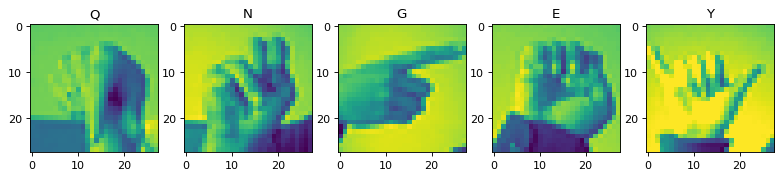

In [ ]:
# plotting 5 pictures with their labels
random.seed(2)
labels = []
plt.figure(figsize=(12, 10), dpi=80)
for i in range(5):
  my_test_id = random.randrange(1, csvreader_train.line_num-1, 1)
  plt.subplot(1, 5, i+1)
  plt.imshow(np.array(rows_train[my_test_id][1:]).reshape(28,28))
  labels.append(rows_train[my_test_id][0])
  converted_label = chr(int(labels[-1])+65)
  plt.title(converted_label)

in this part I seperated the inputs and their labels. I also printed some of them to see if I did that well.

In [ ]:
# seperating the trainnig inputs and their corresponding labels
x_train = rows_train[:, 1:]
y_train = rows_train[:,0]
# seperating the testing inputs and their corresponding labels
x_test = rows_test[:, 1:]
y_test = rows_test[:,0]

print(y_test)
print(x_test)

[ 6.  5. 10. ...  2.  4.  2.]
[[149. 149. 150. ... 112. 120. 107.]
 [126. 128. 131. ... 184. 182. 180.]
 [ 85.  88.  92. ... 225. 224. 222.]
 ...
 [190. 191. 190. ... 211. 209. 208.]
 [201. 205. 208. ...  67.  70.  63.]
 [173. 174. 173. ... 195. 193. 192.]]


in this part I wanted to extract number of labels but I found that there isn't any label "9" in the data.

In [ ]:
# figureing out number of labels
n_labels = np.unique(y_train).shape[0]
print(n_labels)
print(np.unique(y_train))

24
[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


in this part I actually normalize the inputs and change the labels to one hot encoding.

In [ ]:
num_classes = 25
# changeing the type of data from 'float64' to 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalizing data betwrrn 0 and 1
x_train /= 255
x_test /= 255
# printing the number of data sample
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# one hot representative
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

27455 train samples
7172 test samples


# Training

In [91]:
#building and training part
batch_size = 128
epochs = 180

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=1/6)

# printing the loss and accuracy of the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 128)               100480    
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_158 (Dense)           (None, 64)                8256      
                                                                 
 dense_159 (Dense)           (None, 25)                1625      
                                                                 
Total params: 110361 (431.10 KB)
Trainable params: 110361 (431.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/180
179/179 [==============================] - 2s 8ms/step - loss: 2.7440 - accuracy: 0.1853 - val_loss: 2.0226 - val_accuracy: 0.3977
Ep

in this part I plotted loss and accuracy per epoch during training, for both train and validation data.

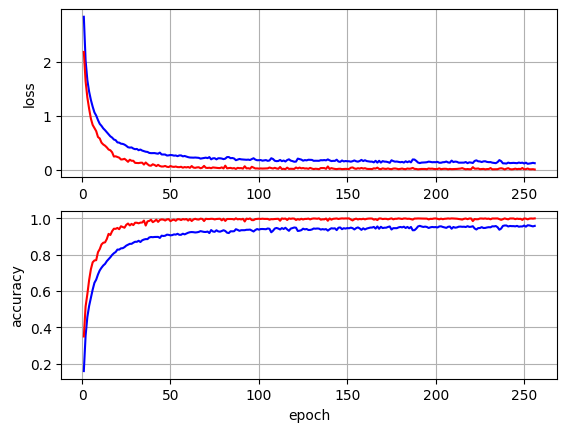

In [89]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b',
         range(1,epochs+1), history.history['val_loss'],'r')
plt.ylabel('loss')
plt.grid()
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['accuracy'], 'b',
         range(1,epochs+1), history.history['val_accuracy'],'r')
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('epoch')
plt.show()

In [85]:
# saving the model
model.save('my_model_HW1_4_8.h5')

in this part I load my best models to see the result. you can just run this part to see my model result.

model with dropout

In [97]:
# loading the best model
from keras.models import load_model
model = load_model('my_model_HW1_4_6.h5')
model.summary()
# printing the loss and accuracy of the model on trainig data
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
# printing the loss and accuracy of the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 128)               100480    
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_143 (Dense)           (None, 64)                8256      
                                                                 
 dense_144 (Dense)           (None, 25)                1625      
                                                                 
Total params: 110361 (431.10 KB)
Trainable params: 110361 (431.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train loss: 0.0021659776102751493
Train accuracy: 0.9993808269500732
Test loss: 1.7165791988372803
Test accuracy: 0.7735638618469238


model without dropout

In [96]:
# loading the best model
from keras.models import load_model
model = load_model('my_model_HW1_4_3.h5')
model.summary()
# printing the loss and accuracy of the model on trainig data
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
# printing the loss and accuracy of the model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 25)                1625      
                                                                 
Total params: 110361 (431.10 KB)
Trainable params: 110361 (431.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train loss: 0.09937889128923416
Train accuracy: 0.9866326451301575
Test loss: 1.0578244924545288
Test accuracy: 0.7612939476966858


the sites I used:

https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/
https://www.geeksforgeeks.org/working-csv-files-python/
https://www.programiz.com/python-programming/examples/ascii-character#google_vignette
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting

